In [1]:
#csvからpandasDfに変換
import pandas as pd 
bitcoin_market_info = pd.read_csv("data/bitcoin_market_info.csv", index_col=0)
eth_market_info = pd.read_csv("data/eth_market_info.csv", index_col=0)
# Dateを文字列から日付フォーマットへ変換
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))

In [2]:
bitcoin_market_info

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap
0,2021-12-26,50428.69,51196.38,49623.10,50809.52,2.096437e+10,9.609000e+11
1,2021-12-25,50854.92,51176.60,50236.71,50429.86,1.903065e+10,9.536781e+11
2,2021-12-24,50806.05,51814.03,50514.49,50822.20,2.436791e+10,9.610515e+11
3,2021-12-23,48626.34,51332.34,48065.84,50784.54,2.822388e+10,9.602908e+11
4,2021-12-22,48937.10,49544.80,48450.94,48628.51,2.444798e+10,9.194760e+11
...,...,...,...,...,...,...,...
3160,2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09
3161,2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09
3162,2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09
3163,2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09


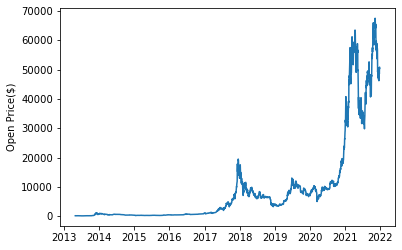

In [3]:
import matplotlib.pyplot as plt
#ビットコイン
#始値のプロット
x = bitcoin_market_info['Date']
y = bitcoin_market_info['bt_Open']
plt.plot(x,y)
plt.ylabel("Open Price($)")
plt.show()

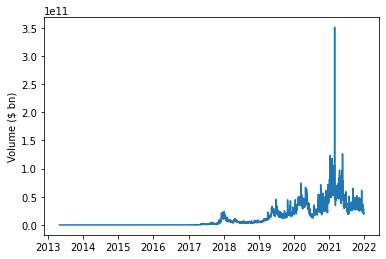

In [4]:
x = bitcoin_market_info['Date']
y = bitcoin_market_info["bt_Volume"]
plt.plot(x,y)
plt.ylabel("Volume ($ bn)")
plt.show()

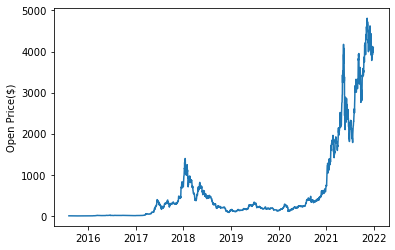

In [5]:
#イーサリアム
#始値のプロット
x = eth_market_info['Date']
y = eth_market_info['eth_Open']
plt.plot(x,y)
plt.ylabel("Open Price($)")
plt.show()

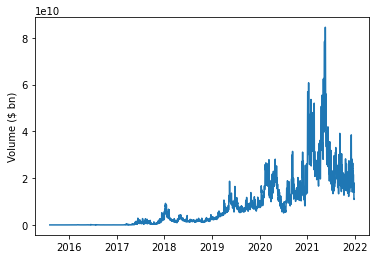

In [6]:
# Volumeのプロット
x = eth_market_info['Date']
y = eth_market_info["eth_Volume"]
plt.plot(x,y)
plt.ylabel("Volume ($ bn)")
plt.show()

In [7]:
#終値をfloat型に
#同日のオープンとクローズの差をオープンで割った指標
market_info = pd.merge(bitcoin_market_info,eth_market_info, on=['Date'])
market_info = market_info[market_info['Date']>='2016-01-01']
market_info = market_info.assign(bt_day_diff=(market_info['bt_Close']-market_info['bt_Open'])/market_info['bt_Open'])
market_info = market_info.assign(eth_day_diff=(market_info['eth_Close']-market_info['eth_Open'])/market_info['eth_Open'])
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
0,2021-12-26,50428.69,51196.38,49623.10,50809.52,2.096437e+10,9.609000e+11,4094.15,4105.02,4013.03,4067.33,1.119724e+10,4.836202e+11,0.007552,-0.006551
1,2021-12-25,50854.92,51176.60,50236.71,50429.86,1.903065e+10,9.536781e+11,4049.78,4138.57,4027.93,4093.28,1.089479e+10,4.866505e+11,-0.008358,0.010741
2,2021-12-24,50806.05,51814.03,50514.49,50822.20,2.436791e+10,9.610515e+11,4111.34,4134.11,4029.06,4047.98,1.276909e+10,4.812102e+11,0.000318,-0.015411
3,2021-12-23,48626.34,51332.34,48065.84,50784.54,2.822388e+10,9.602908e+11,3981.96,4149.03,3897.23,4108.02,1.800727e+10,4.882910e+11,0.044383,0.031658
4,2021-12-22,48937.10,49544.80,48450.94,48628.51,2.444798e+10,9.194760e+11,4018.70,4073.79,3947.69,3982.10,1.392176e+10,4.732700e+11,-0.006306,-0.009107


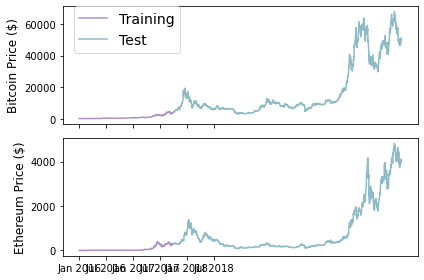

In [8]:
import datetime
split_date = '2017-10-01'
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'],market_info[market_info['Date'] < split_date]['bt_Close'],
color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'],
         market_info[market_info['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_info[market_info['Date'] < split_date]['Date'],
         market_info[market_info['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'],
         market_info[market_info['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
# fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0]*0.65), int(bitcoin_im.size[1]*0.65)), Image.ANTIALIAS), 
#              200, 260, zorder=3,alpha=.5)
# fig.figimage(eth_im.resize((int(eth_im.size[0]*0.65), int(eth_im.size[1]*0.65)), Image.ANTIALIAS), 
#              350, 40, zorder=3,alpha=.5)
plt.show()

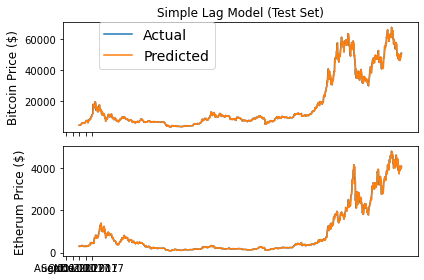

In [9]:
# 前日の価格を翌日の予想価格として扱うラグモデルの予測プロッティング
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
datetime.timedelta(days=1)]['bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
datetime.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
fig.tight_layout()
plt.show()


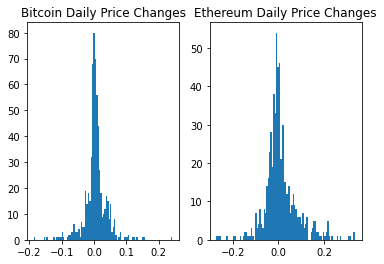

In [10]:
#日毎の価格変動
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(market_info[market_info['Date']< split_date]['bt_day_diff'].values, bins=100)
ax2.hist(market_info[market_info['Date']< split_date]['eth_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
plt.show()

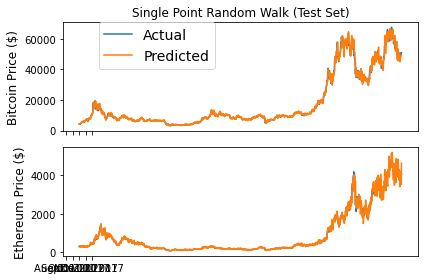

In [11]:
import numpy as np
np.random.seed(202)
bt_r_walk_mean, bt_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['bt_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean, eth_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
     market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
     market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

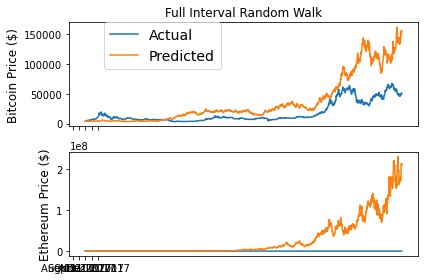

In [12]:
bt_random_walk = []
eth_random_walk = []
for n_step, (bt_step, eth_step) in enumerate(zip(bt_random_steps, eth_random_steps)):
    if n_step==0:
        bt_random_walk.append(market_info[market_info['Date']< split_date]['bt_Close'].values[0] * (bt_step+1))
        eth_random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (eth_step+1))
    else:
        bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
        eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'],
bt_random_walk[::-1], label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'],
eth_random_walk[::-1], label='Predicted')
ax1.set_title('Full Interval Random Walk')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

In [13]:
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
    coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_info = market_info.assign(**kwargs)


In [14]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
2186,2016-01-01,434.33,36278900.0,-0.560137,0.020268,0.9480,206062.0,-0.418803,0.025062
2185,2016-01-02,433.44,30096600.0,0.250597,0.009641,0.9371,255504.0,0.969697,0.034832
2184,2016-01-03,430.01,39633800.0,-0.173865,0.020827,0.9719,407632.0,-0.316988,0.060848
2183,2016-01-04,433.09,38477500.0,-0.474265,0.012649,0.9545,346245.0,-0.060086,0.047942
2182,2016-01-05,431.96,34522600.0,-0.013333,0.010391,0.9502,219833.0,0.692946,0.025286


In [15]:
# dateのカラムを削除
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

C:\Users\tsuku\AppData\Local\Temp/ipykernel_19808/1605740575.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  training_set = training_set.drop('Date', 1)
C:\Users\tsuku\AppData\Local\Temp/ipykernel_19808/1605740575.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_set = test_set.drop('Date', 1)


In [16]:
# 「窓」を10日に設定
# 終値と取引量を正規化
window_len = 10
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close','Volume']]
 

In [17]:
# トレーニングとテストのデータセットを「窓」で分ける
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
 
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1
 
#最後にトレーニングのインプットデータを確認してみましょう
LSTM_training_inputs[0]

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
2186,0.000000,0.000000,-0.560137,0.020268,0.000000,0.000000,-0.418803,0.025062
2185,-0.002049,-0.170410,0.250597,0.009641,-0.011498,0.239937,0.969697,0.034832
2184,-0.009946,0.092475,-0.173865,0.020827,0.025211,0.978201,-0.316988,0.060848
2183,-0.002855,0.060603,-0.474265,0.012649,0.006857,0.680295,-0.060086,0.047942
2182,-0.005457,-0.048411,-0.013333,0.010391,0.002321,0.066829,0.692946,0.025286
2181,-0.012019,-0.061645,-0.003623,0.012782,0.003059,0.498534,-0.216000,0.026316
2180,0.054613,1.413585,-0.951499,0.069045,-0.006329,2.142074,0.680412,0.040594
2179,0.043515,0.570968,0.294196,0.032762,0.040928,1.647747,-0.808061,0.055261
2178,0.030576,-0.110282,0.814194,0.017094,0.040928,0.098121,-0.411765,0.018975
2177,0.031451,-0.007801,-0.919598,0.017758,0.054008,0.896944,-0.935743,0.025264


In [18]:
# PandasのデータフレームからNumpy配列へ変換
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)
 
LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [19]:
# Kerasの使用するコンポーネントをインポート
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
 
# モデル構築
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [20]:
# ランダムシードの設定
np.random.seed(202)
 
# 初期モデルの構築
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
 
# モデルのアウトプットは次の窓の10番目の価格（正規化されている）
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
 
# データを流してフィッティング
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
629/629 - 2s - loss: 0.1494
Epoch 2/50
629/629 - 2s - loss: 0.0992
Epoch 3/50
629/629 - 2s - loss: 0.0886
Epoch 4/50
629/629 - 2s - loss: 0.0822
Epoch 5/50
629/629 - 2s - loss: 0.0817
Epoch 6/50
629/629 - 1s - loss: 0.0787
Epoch 7/50
629/629 - 1s - loss: 0.0762
Epoch 8/50
629/629 - 1s - loss: 0.0745
Epoch 9/50
629/629 - 1s - loss: 0.0750
Epoch 10/50
629/629 - 1s - loss: 0.0754
Epoch 11/50
629/629 - 1s - loss: 0.0723
Epoch 12/50
629/629 - 1s - loss: 0.0670
Epoch 13/50
629/629 - 1s - loss: 0.0700
Epoch 14/50
629/629 - 1s - loss: 0.0697
Epoch 15/50
629/629 - 2s - loss: 0.0712
Epoch 16/50
629/629 - 2s - loss: 0.0684
Epoch 17/50
629/629 - 1s - loss: 0.0696
Epoch 18/50
629/629 - 1s - loss: 0.0666
Epoch 19/50
629/629 - 1s - loss: 0.0665
Epoch 20/50
629/629 - 1s - loss: 0.0676
Epoch 21/50
629/629 - 1s - loss: 0.0668
Epoch 22/50
629/629 - 1s - loss: 0.0647
Epoch 23/50
629/629 - 1s - loss: 0.0689
Epoch 24/50
629/629 - 1s - loss: 0.0658
Epoch 25/50
629/629 - 1s - loss: 0.0660
Epoch 26/

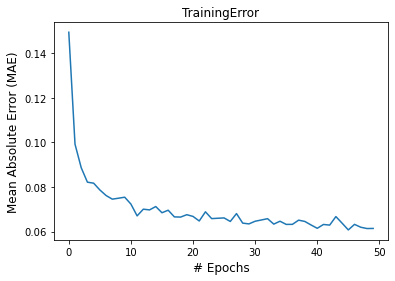

In [21]:
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('TrainingError')
 
if eth_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# model on ロス計算を変更した場合のため
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

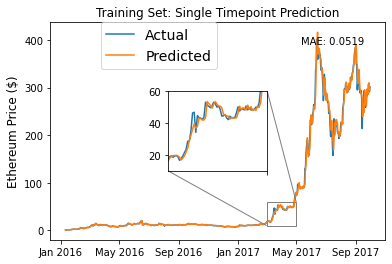

In [24]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close'].values[window_len:])/(training_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# 下記コードはこちらのURL参照しました：http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 3.35, loc=10)
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['eth_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 5, 1)])
axins.set_ylim([10,60])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

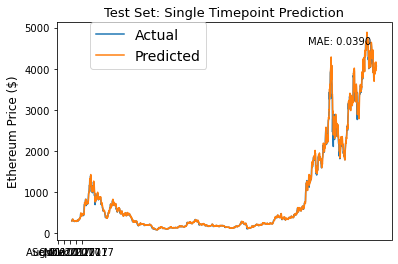

In [26]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         test_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
            (test_set['eth_Close'].values[window_len:])/(test_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [27]:
# ランダムシードの設定
np.random.seed(202)
 
# モデル構成
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
 
# トレーニングデータでモデルの訓練（ビットコイン版）
bt_history = bt_model.fit(LSTM_training_inputs, 
                            (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
629/629 - 2s - loss: 0.0948
Epoch 2/50
629/629 - 2s - loss: 0.0536
Epoch 3/50
629/629 - 2s - loss: 0.0483
Epoch 4/50
629/629 - 2s - loss: 0.0408
Epoch 5/50
629/629 - 2s - loss: 0.0398
Epoch 6/50
629/629 - 2s - loss: 0.0363
Epoch 7/50
629/629 - 2s - loss: 0.0341
Epoch 8/50
629/629 - 2s - loss: 0.0327
Epoch 9/50
629/629 - 1s - loss: 0.0329
Epoch 10/50
629/629 - 2s - loss: 0.0323
Epoch 11/50
629/629 - 1s - loss: 0.0310
Epoch 12/50
629/629 - 1s - loss: 0.0311
Epoch 13/50
629/629 - 2s - loss: 0.0319
Epoch 14/50
629/629 - 1s - loss: 0.0303
Epoch 15/50
629/629 - 2s - loss: 0.0310
Epoch 16/50
629/629 - 2s - loss: 0.0295
Epoch 17/50
629/629 - 1s - loss: 0.0295
Epoch 18/50
629/629 - 1s - loss: 0.0314
Epoch 19/50
629/629 - 1s - loss: 0.0284
Epoch 20/50
629/629 - 1s - loss: 0.0281
Epoch 21/50
629/629 - 1s - loss: 0.0289
Epoch 22/50
629/629 - 1s - loss: 0.0283
Epoch 23/50
629/629 - 1s - loss: 0.0290
Epoch 24/50
629/629 - 1s - loss: 0.0301
Epoch 25/50
629/629 - 1s - loss: 0.0285
Epoch 26/

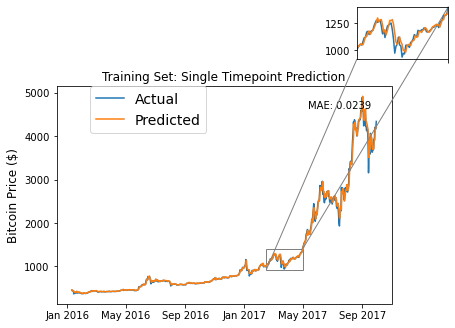

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
training_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
(training_set['bt_Close'].values[window_len:])/(training_set['bt_Close'].values[:-window_len]))), 
xy=(0.75, 0.9),  xycoords='axes fraction',
xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
training_set['bt_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
label='Predicted')
axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
axins.set_ylim([920, 1400])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()


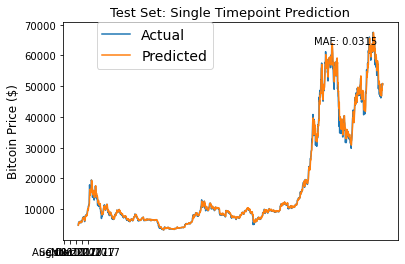

In [29]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][10:],
test_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][10:],
((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_Close'].values[:-window_len])[0], 
label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
(test_set['bt_Close'].values[window_len:])/(test_set['bt_Close'].values[:-window_len]))), 
xy=(0.75, 0.9),  xycoords='axes fraction',
xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()


In [31]:
# このコードは実行に時間を要しますので気をつけてください
# 両仮想通貨で25　LSTMモデルを構築します
# h5py経由でモデルを保存します
import h5py
 
for rand_seed in range(775,800):
    print(rand_seed)
    np.random.seed(rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('eth_model_randseed_%d.h5'%rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('bt_model_randseed_%d.h5'%rand_seed)
 


775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799


In [32]:
# 構築したLSTMモデルのMAEを計算してみましょう
 
from keras.models import load_model
 
eth_preds = []
bt_preds = []
for rand_seed in range(775,800):
    temp_model = load_model('eth_model_randseed_%d.h5'%rand_seed)
    eth_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['eth_Close'].values[window_len:]/test_set['eth_Close'].values[:-window_len]-1))))
    temp_model = load_model('bt_model_randseed_%d.h5'%rand_seed)
    bt_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['bt_Close'].values[window_len:]/test_set['bt_Close'].values[:-window_len]-1))))

In [33]:
eth_random_walk_preds = []
bt_random_walk_preds = []
for rand_seed in range(775,800):
    np.random.seed(rand_seed)
    eth_random_walk_preds.append(
        np.mean(np.abs((np.random.normal(eth_r_walk_mean, eth_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['eth_Close'][window_len:])/np.array(test_set['eth_Close'][:-window_len]))))
    bt_random_walk_preds.append(
    np.mean(np.abs((np.random.normal(bt_r_walk_mean, bt_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['bt_Close'][window_len:])/np.array(test_set['bt_Close'][:-window_len]))))

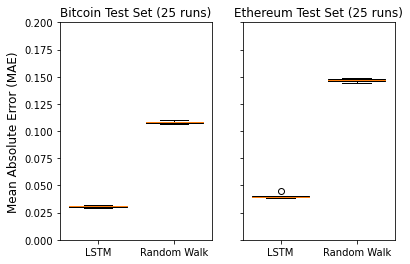

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot([bt_preds, bt_random_walk_preds],widths=0.75)
ax1.set_ylim([0, 0.2])
ax2.boxplot([eth_preds, eth_random_walk_preds],widths=0.75)
ax2.set_ylim([0, 0.2])
ax1.set_xticklabels(['LSTM', 'Random Walk'])
ax2.set_xticklabels(['LSTM', 'Random Walk'])
ax1.set_title('Bitcoin Test Set (25 runs)')
ax2.set_title('Ethereum Test Set (25 runs)')
ax2.set_yticklabels('')
ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
plt.show()